In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
dataset= pd.read_csv('IBM-HR-Employee-Attrition.csv')

In [179]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**heatmap to check the missing value**

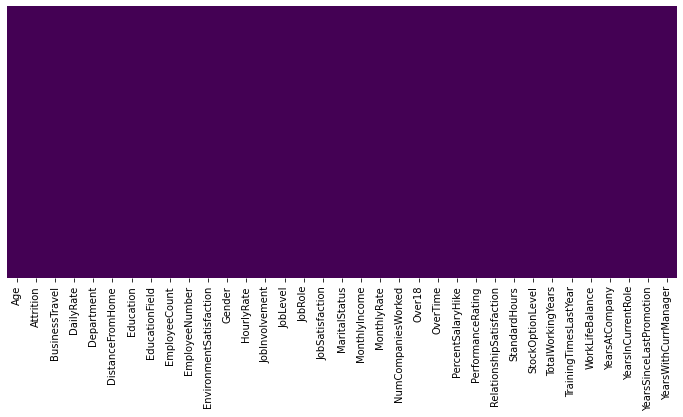

In [181]:
plt.figure(figsize =(12, 5)) 
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap ='viridis') 


**Removing irrelevant data**

In [182]:
dataset.drop('EmployeeCount', axis = 1, inplace = True) 
dataset.drop('StandardHours', axis = 1, inplace = True) 
dataset.drop('EmployeeNumber', axis = 1, inplace = True) 
dataset.drop('Over18', axis = 1, inplace = True) 

**Analysis with respect to Attrition**

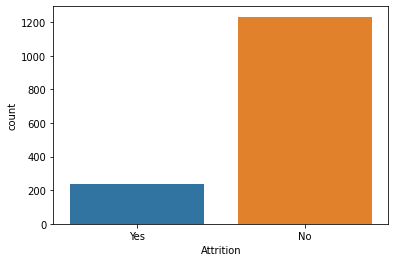

In [183]:
sns.countplot(x ='Attrition', data = dataset)

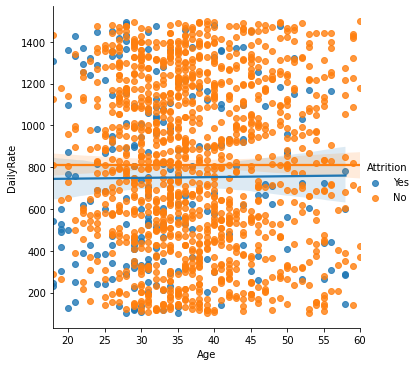

In [184]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = dataset) 

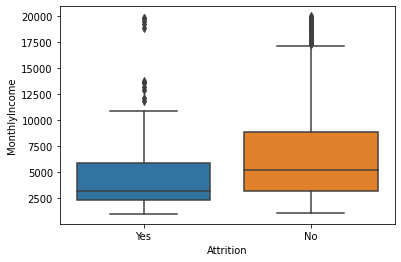

In [185]:
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = dataset)

**Categorical Features**

In [186]:
dataset['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [187]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [188]:
dataset['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [189]:
dataset['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [190]:
dataset['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [191]:
dataset['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [192]:
dataset['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [193]:
dataset['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [194]:
y = dataset.iloc[:, 1] 
x = dataset 
x.drop('Attrition', axis = 1, inplace = True) 

In [195]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder() 
y = encoder.fit_transform(y)

In [196]:
print(y)

[1 0 1 ... 0 0 0]


In [197]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],prefix ='Business', drop_first = True) 
dum_BusinessTravel.head()

,Business_Travel_Frequently,Business_Travel_Rarely
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [198]:
um_Department = pd.get_dummies(dataset['Department'],prefix ='Department', drop_first = True)
dum_Department.head()

,Department_Human Resources,Department_Research & Development,Department_Sales
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [199]:
dum_Gender = pd.get_dummies(dataset['Gender'],prefix ='Gender', drop_first = True)
dum_Gender.head()

,Gender_Male
0,0
1,1
2,1
3,0
4,1


In [200]:
dum_JobRole = pd.get_dummies(dataset['JobRole'],prefix ='JobRole', drop_first = True)
dum_JobRole.head()

,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0


In [201]:
dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],prefix ='MaritalStatus', drop_first = True)
dum_MaritalStatus.head()

,MaritalStatus_Married,MaritalStatus_Single
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [202]:
dum_OverTime = pd.get_dummies(dataset['OverTime'],prefix ='OverTime', drop_first = True)
dum_OverTime.head()

,OverTime_Yes
0,1
1,0
2,1
3,1
4,0


In [203]:
dum_EducationField = pd.get_dummies(dataset['EducationField'],prefix ='EducationField', drop_first = True)
dum_EducationField.head()

,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [204]:
x.drop(['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus', 'OverTime'],axis = 1, inplace = True)

In [205]:
x = pd.concat([x,dum_BusinessTravel, dum_Department,dum_EducationField, dum_Gender, dum_JobRole,dum_MaritalStatus, dum_OverTime], axis = 1)

In [206]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

**Splitting the data**

In [207]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101) 

In [208]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1029, 45) (1029,) (441, 45) (441,)


**Finding best K value**

In [209]:
error_rate=[]

from sklearn.neighbors import KNeighborsClassifier
for i in range(1,40):
  model1=KNeighborsClassifier(n_neighbors=i)
  model1.fit(x_train,y_train)
  predictions1=model1.predict(x_test)
  error_rate.append(np.mean(predictions1!=y_test))

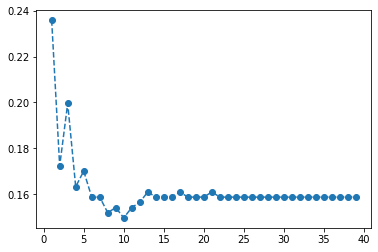

In [210]:
plt.plot(range(1,40),error_rate,linestyle='--', marker='o')
plt.xlabel='K Value'
plt.ylabel='Error Rate'

**Selecting value of K=10 as with minimum error rate**

In [211]:
  model=KNeighborsClassifier(n_neighbors=10)
  model.fit(x_train,y_train)
  predictions=model.predict(x_test)

In [212]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Accuracy score is\n',accuracy_score(y_test,predictions))
print('--------------------------------------------------------')
print('Classification reports are\n',classification_report(y_test,predictions))
print('--------------------------------------------------------')
print('Confusion matrix is:\n',confusion_matrix(y_test,predictions))

Accuracy score is
 0.8503401360544217
--------------------------------------------------------
Classification reports are
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       371
           1       1.00      0.06      0.11        70

    accuracy                           0.85       441
   macro avg       0.92      0.53      0.51       441
weighted avg       0.87      0.85      0.79       441

--------------------------------------------------------
Confusion matrix is:
 [[371   0]
 [ 66   4]]
